In [6]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm 

In [7]:
df=pd.read_csv(r"C:\Users\zbook 17 g3\Downloads\heart_failure_clinical_records_dataset.xls")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<AxesSubplot:xlabel='anaemia', ylabel='count'>

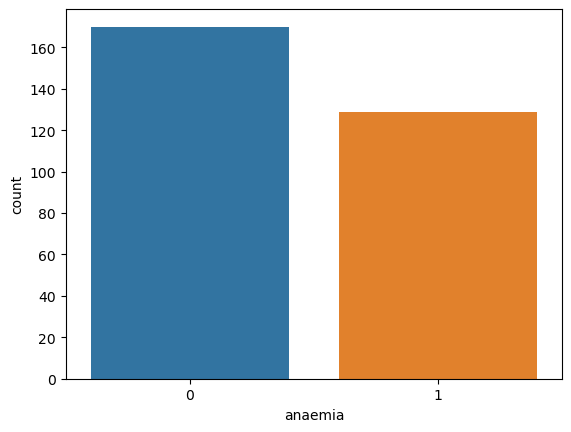

In [10]:
sns.countplot(data=df,x="anaemia")

<AxesSubplot:xlabel='sex', ylabel='count'>

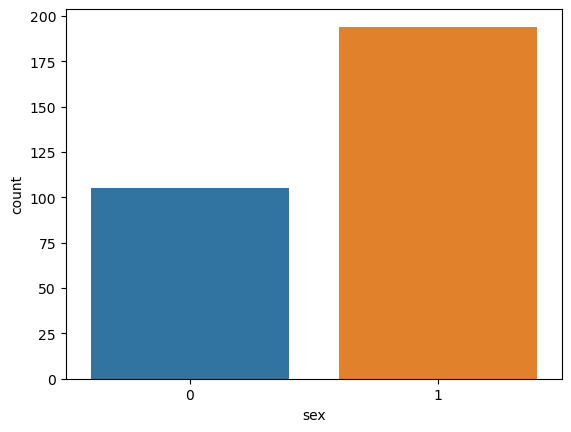

In [11]:
sns.countplot(data=df,x="sex")

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

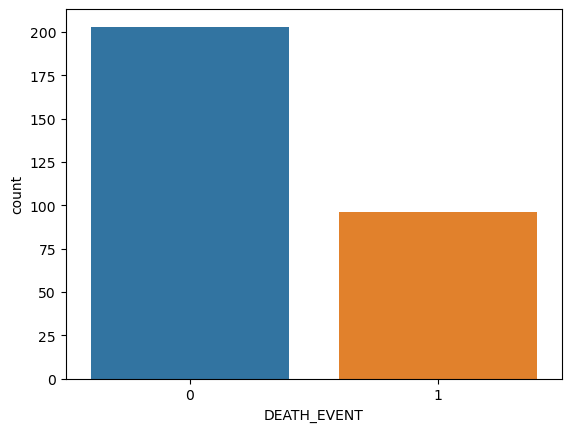

In [12]:
sns.countplot(data=df,x="DEATH_EVENT")

<AxesSubplot:xlabel='age', ylabel='count'>

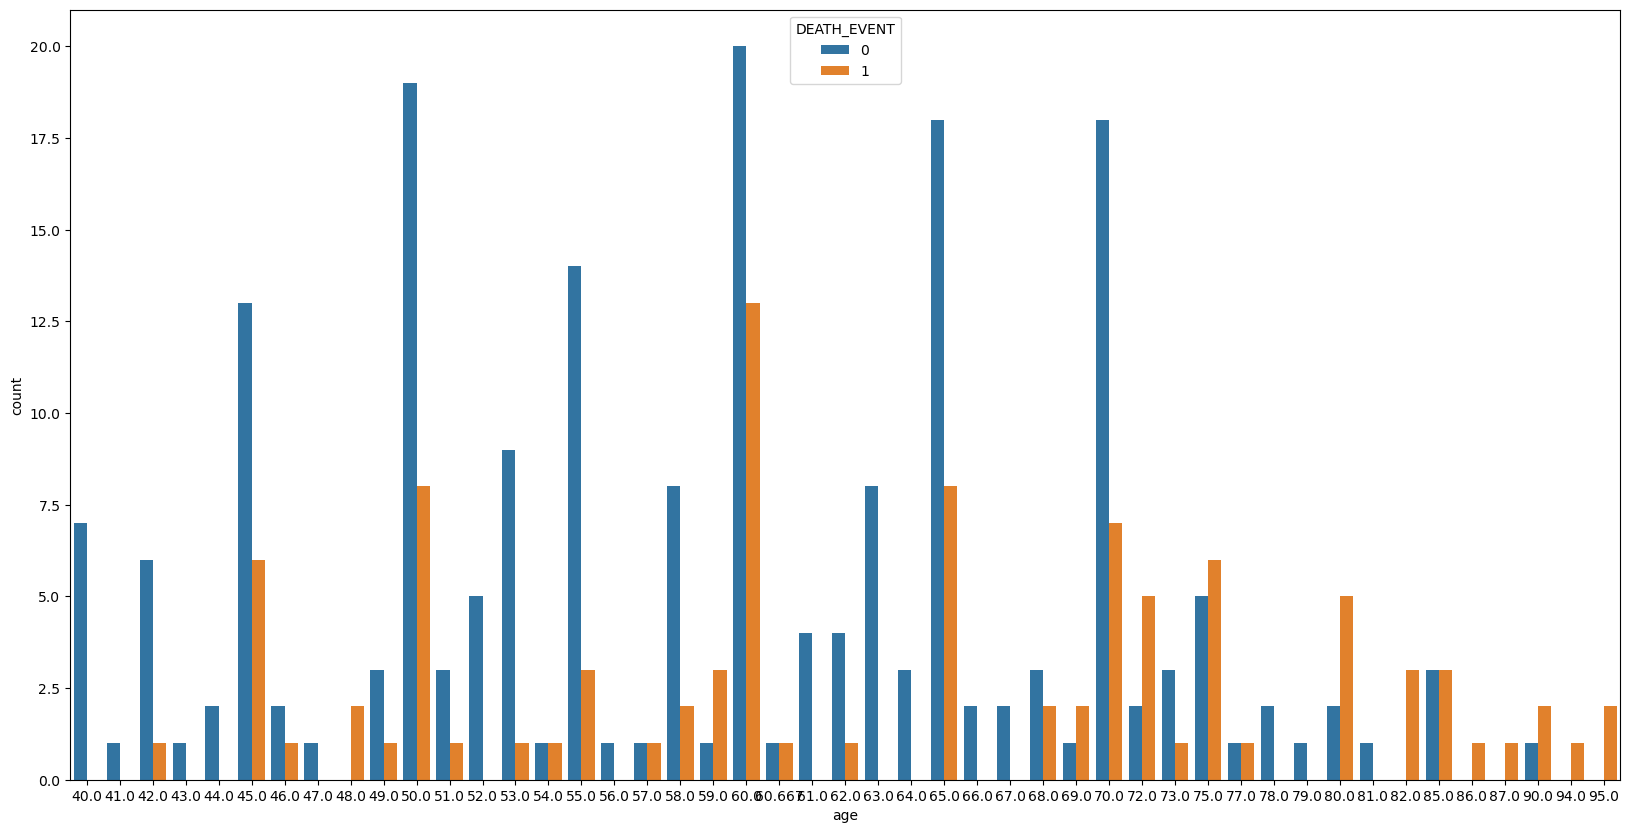

In [13]:

plt.figure(figsize=(20,10))
sns.countplot(x=df['age'],data=df, hue ="DEATH_EVENT")



<AxesSubplot:>

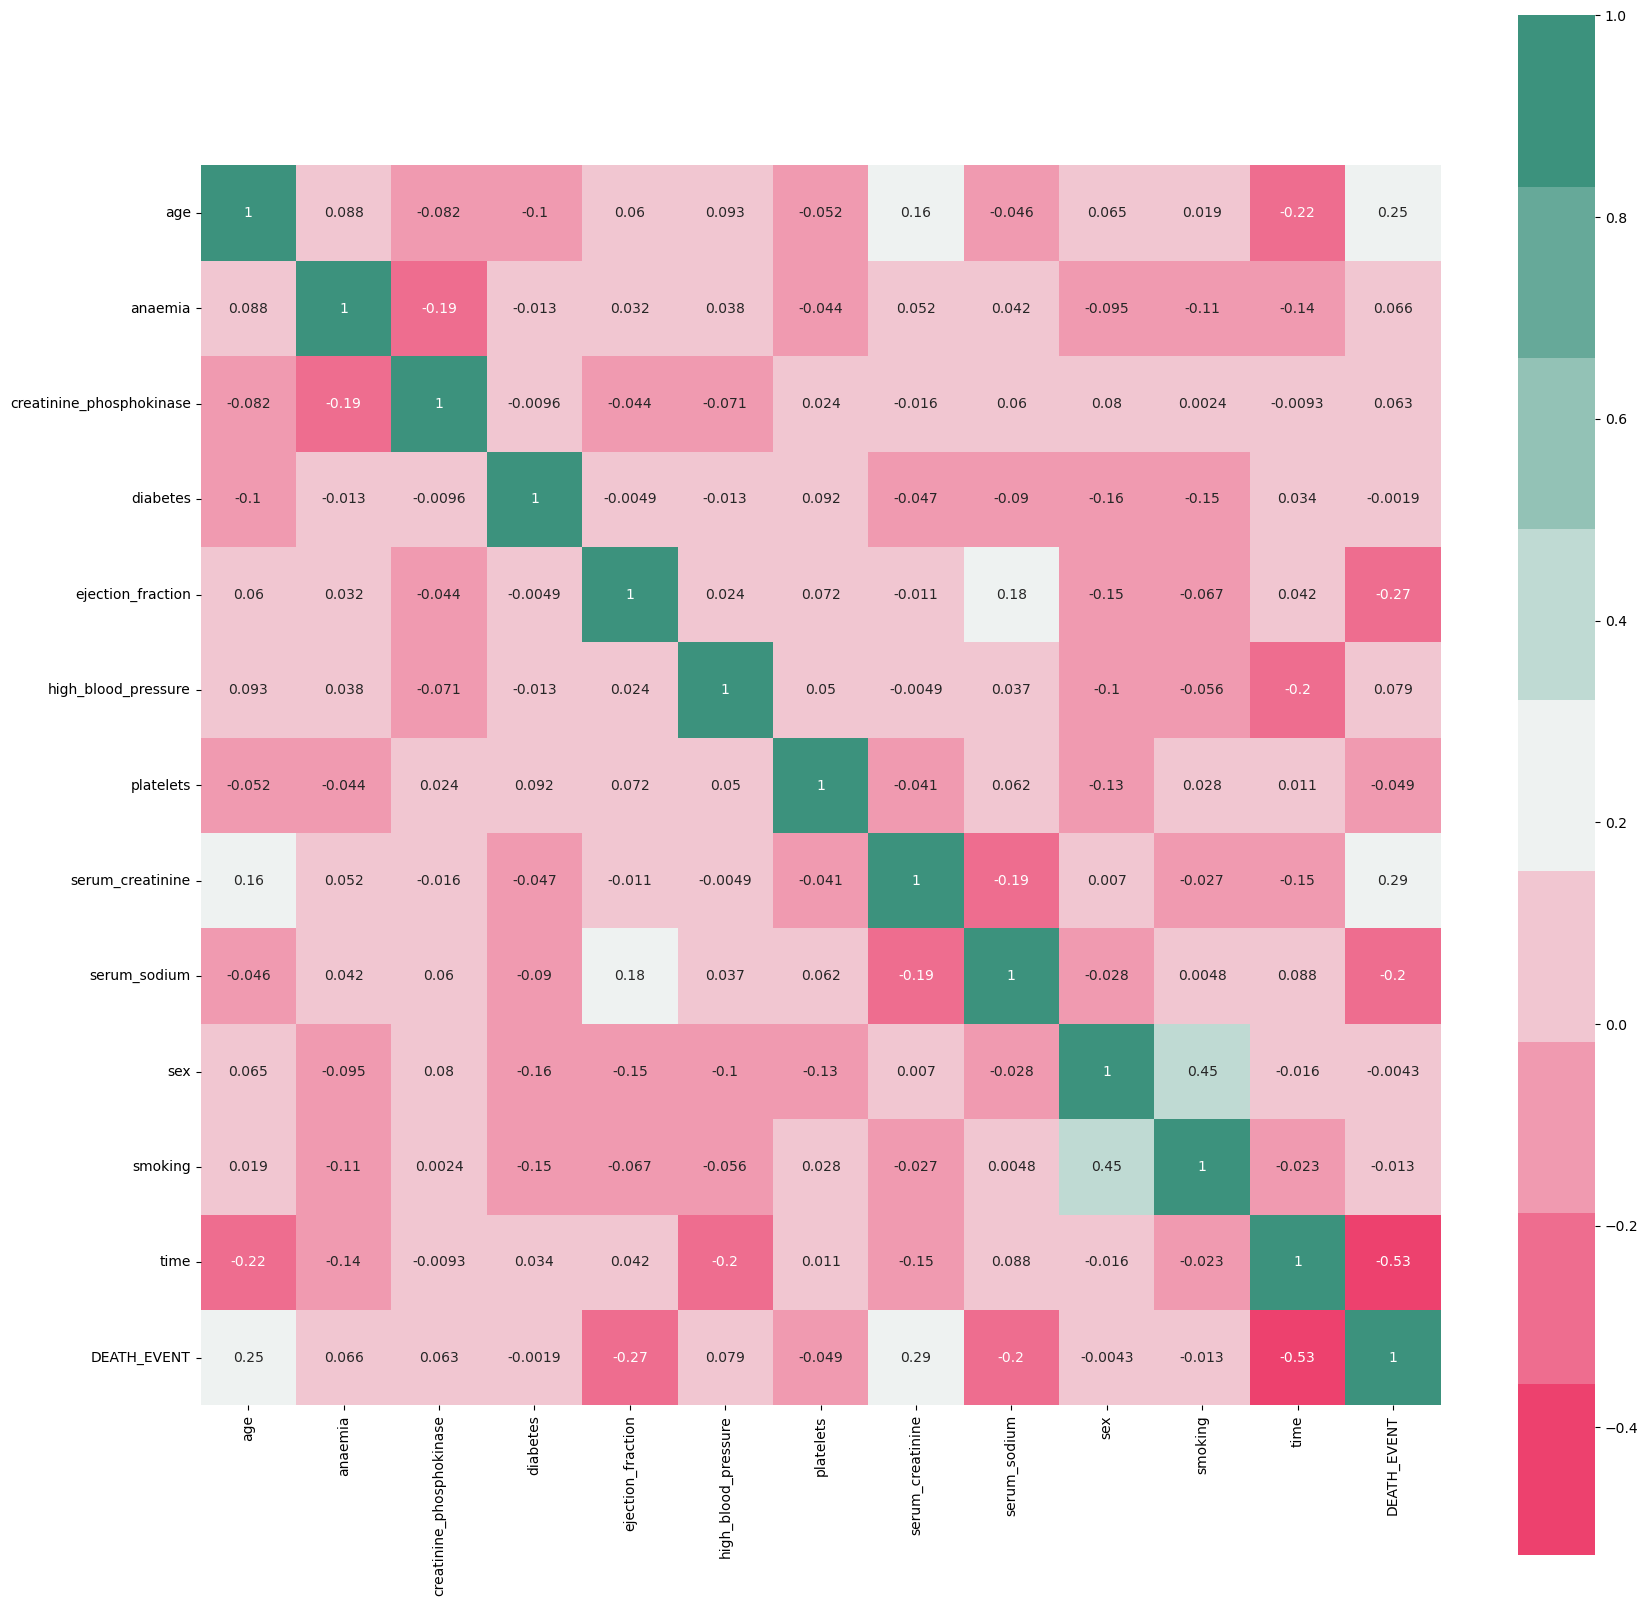

In [14]:
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

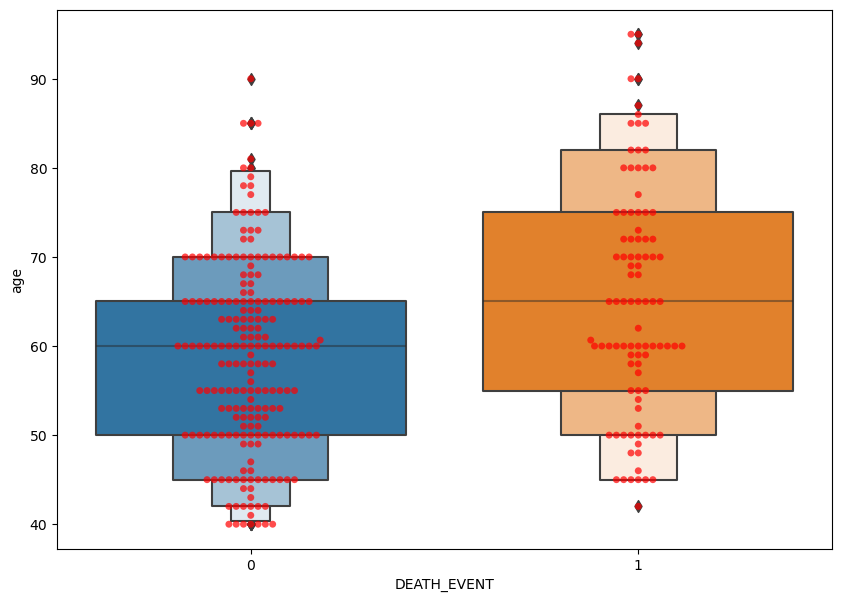

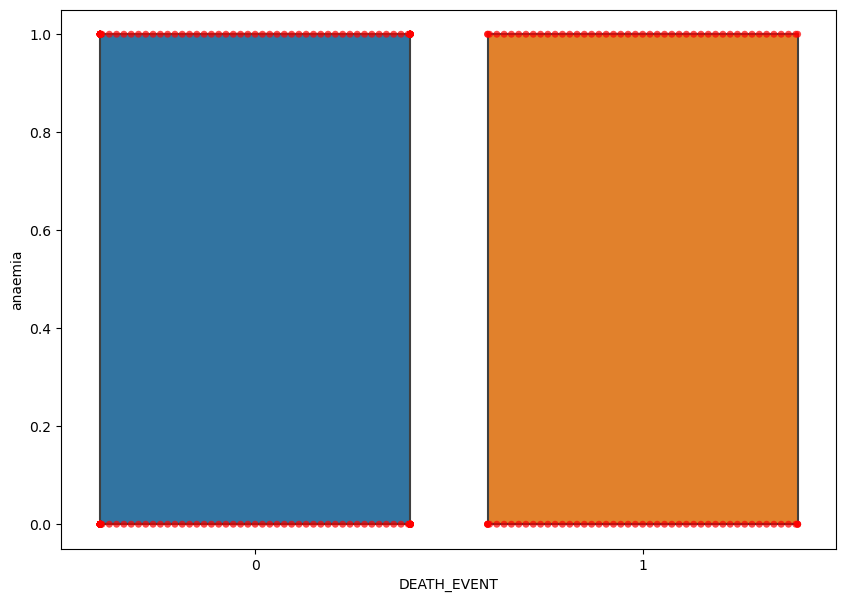

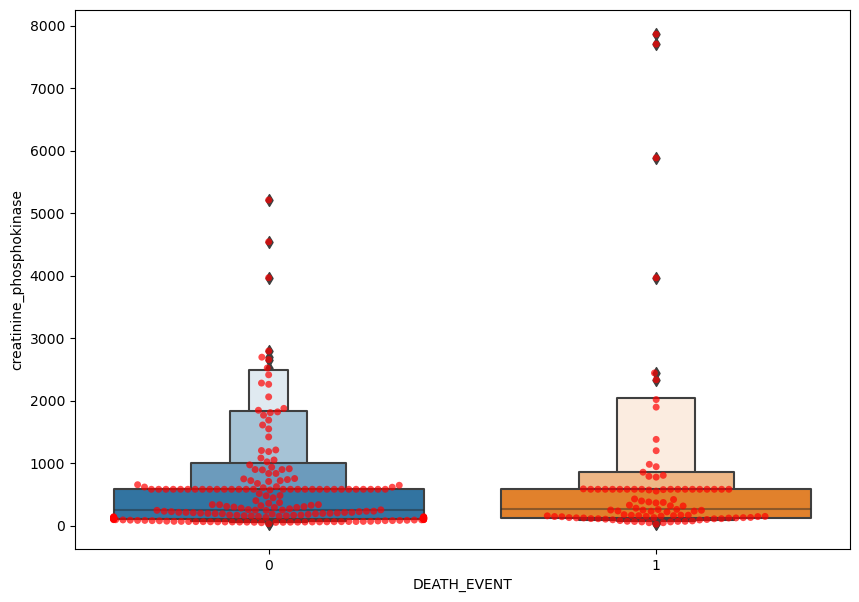

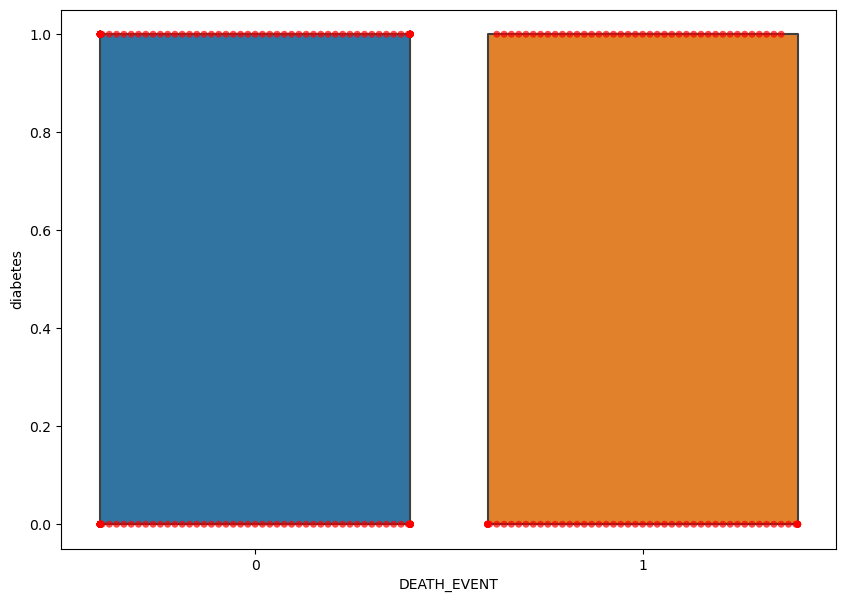

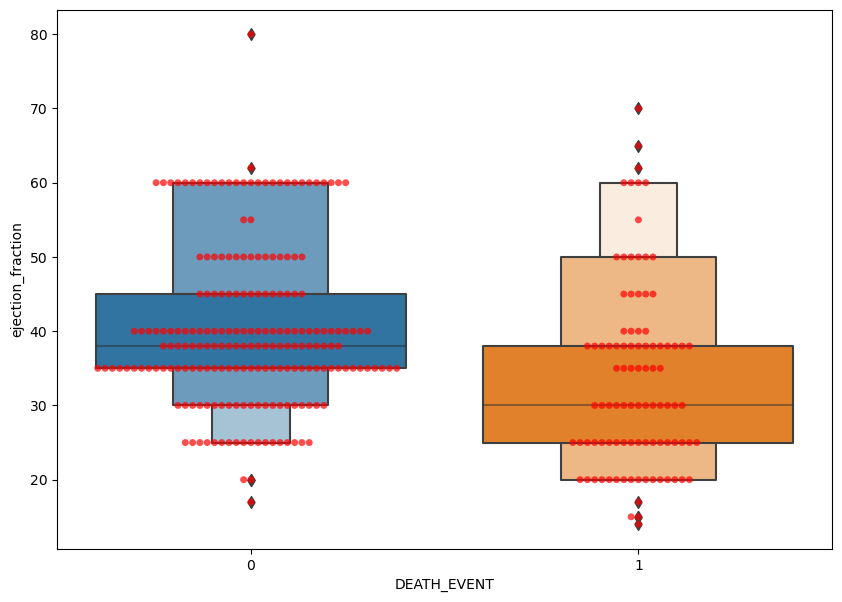

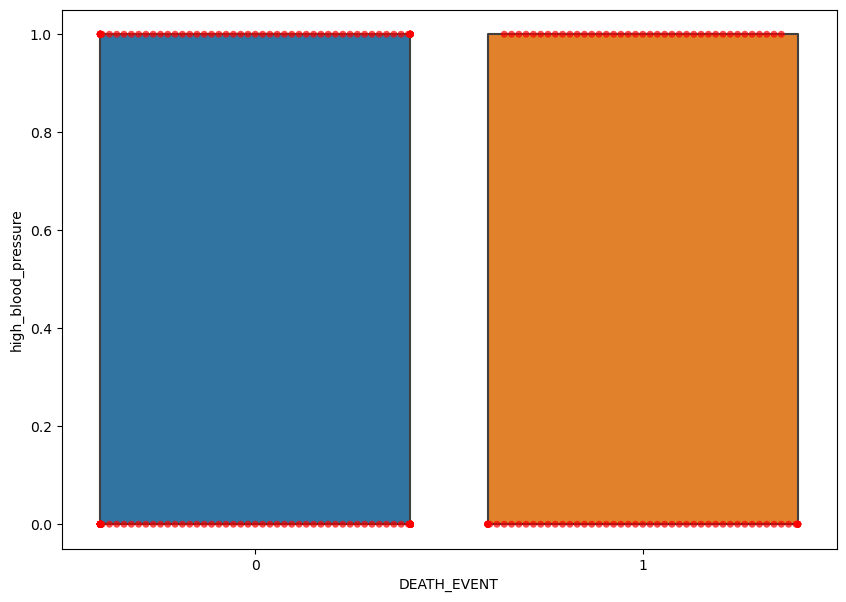

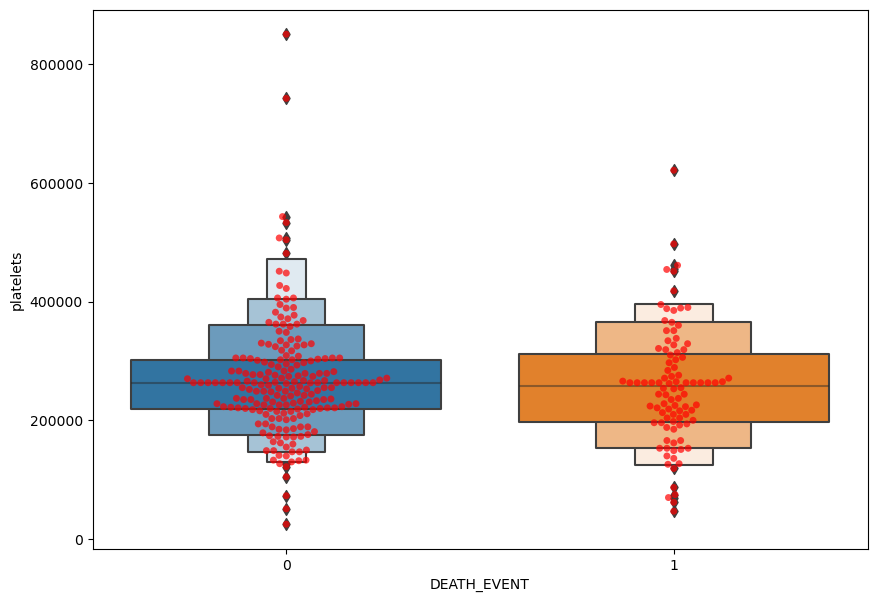

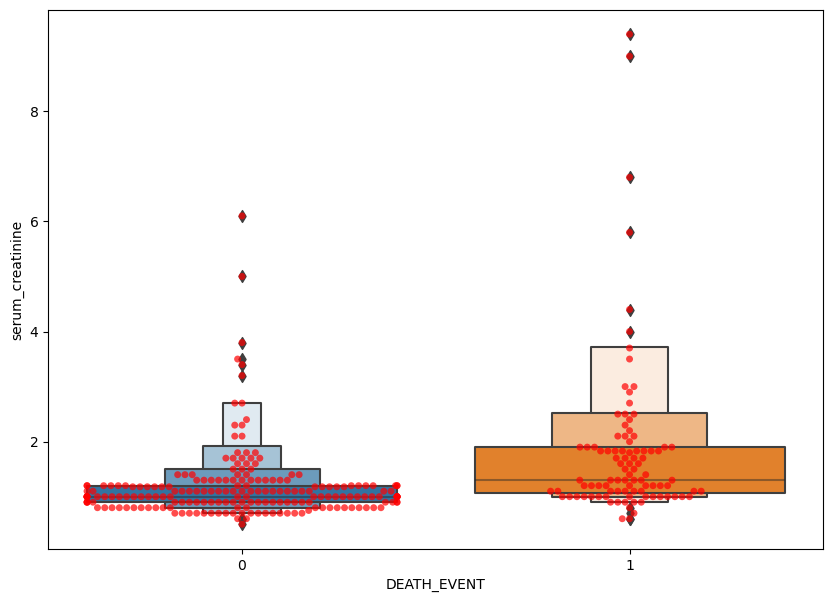

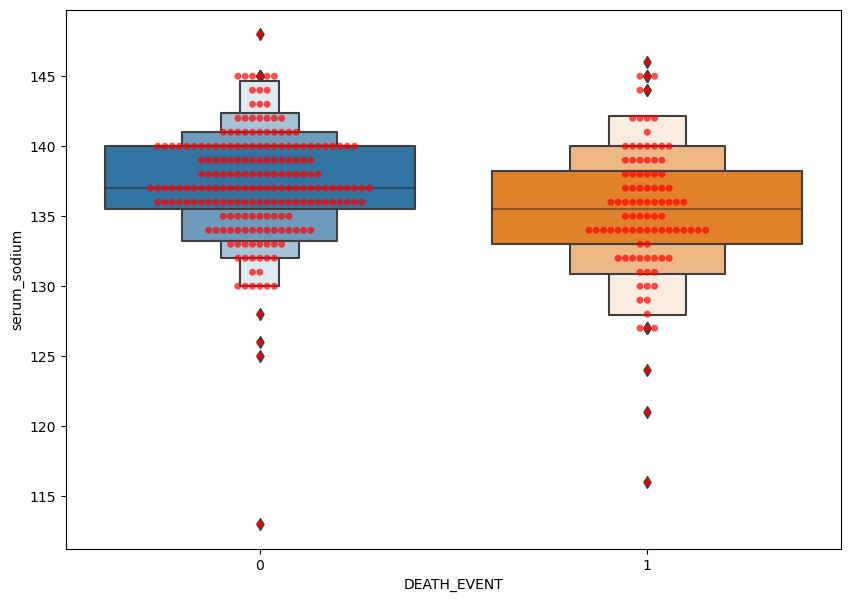

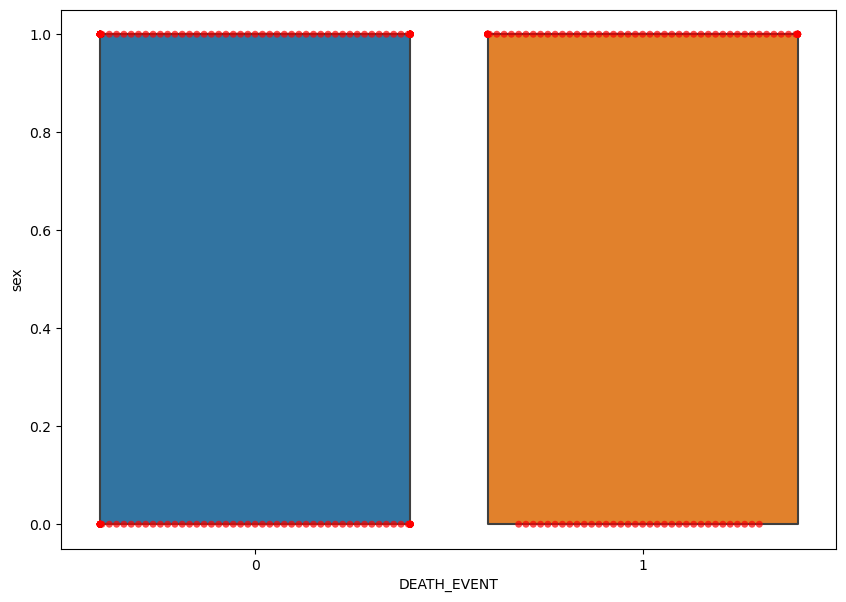

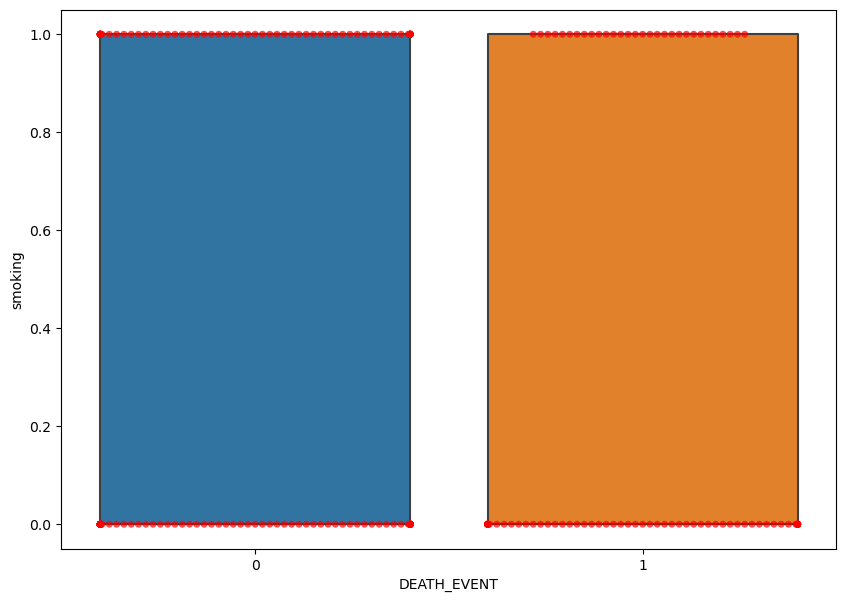

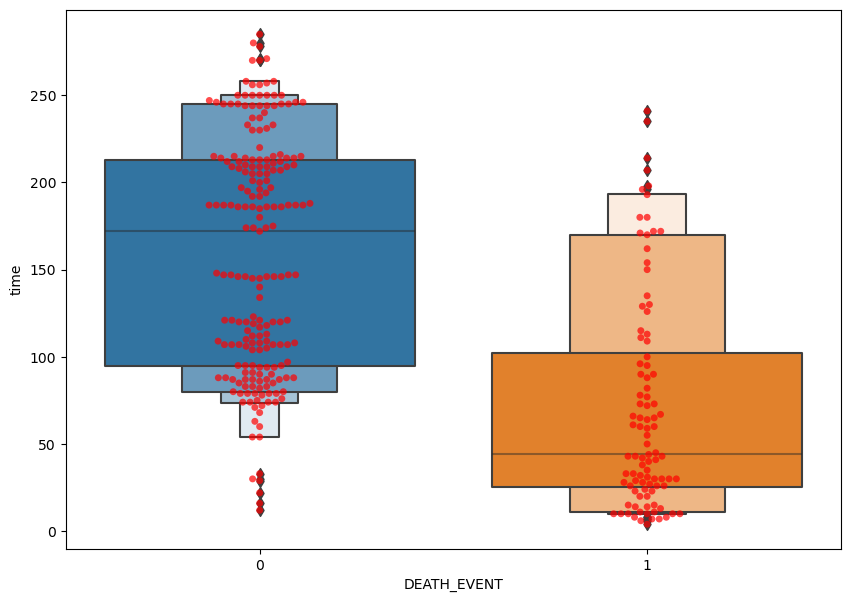

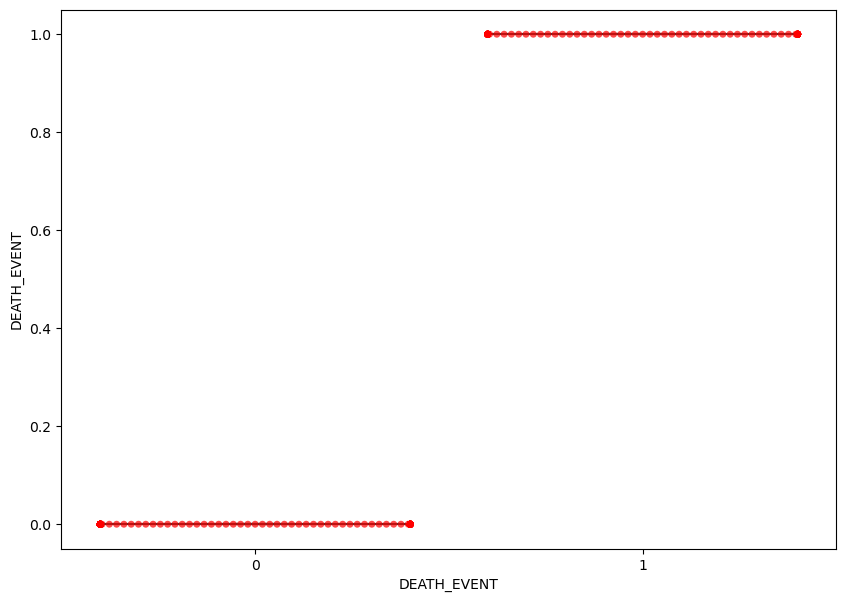

In [15]:
#checking outlires
cols =df.columns 
cols=list(cols)
for col in cols: 
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=df["DEATH_EVENT"], y=df[col], color="red", alpha=0.7)
    sns.boxenplot(x=df["DEATH_EVENT"], y=df[col] )
    plt.show() 

the outlires will be smothed after data preprocessing


In [16]:
x=df.drop("DEATH_EVENT",axis=1)
y=df["DEATH_EVENT"]

In [17]:
#rescalling data as a preprocessing operation
stc=StandardScaler()
x=stc.fit_transform(x)
x=pd.DataFrame(x)
x.describe().T

,count,mean,std,min,25%,50%,75%,max
0,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
1,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
2,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
3,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
4,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
5,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
6,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
7,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
8,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
9,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


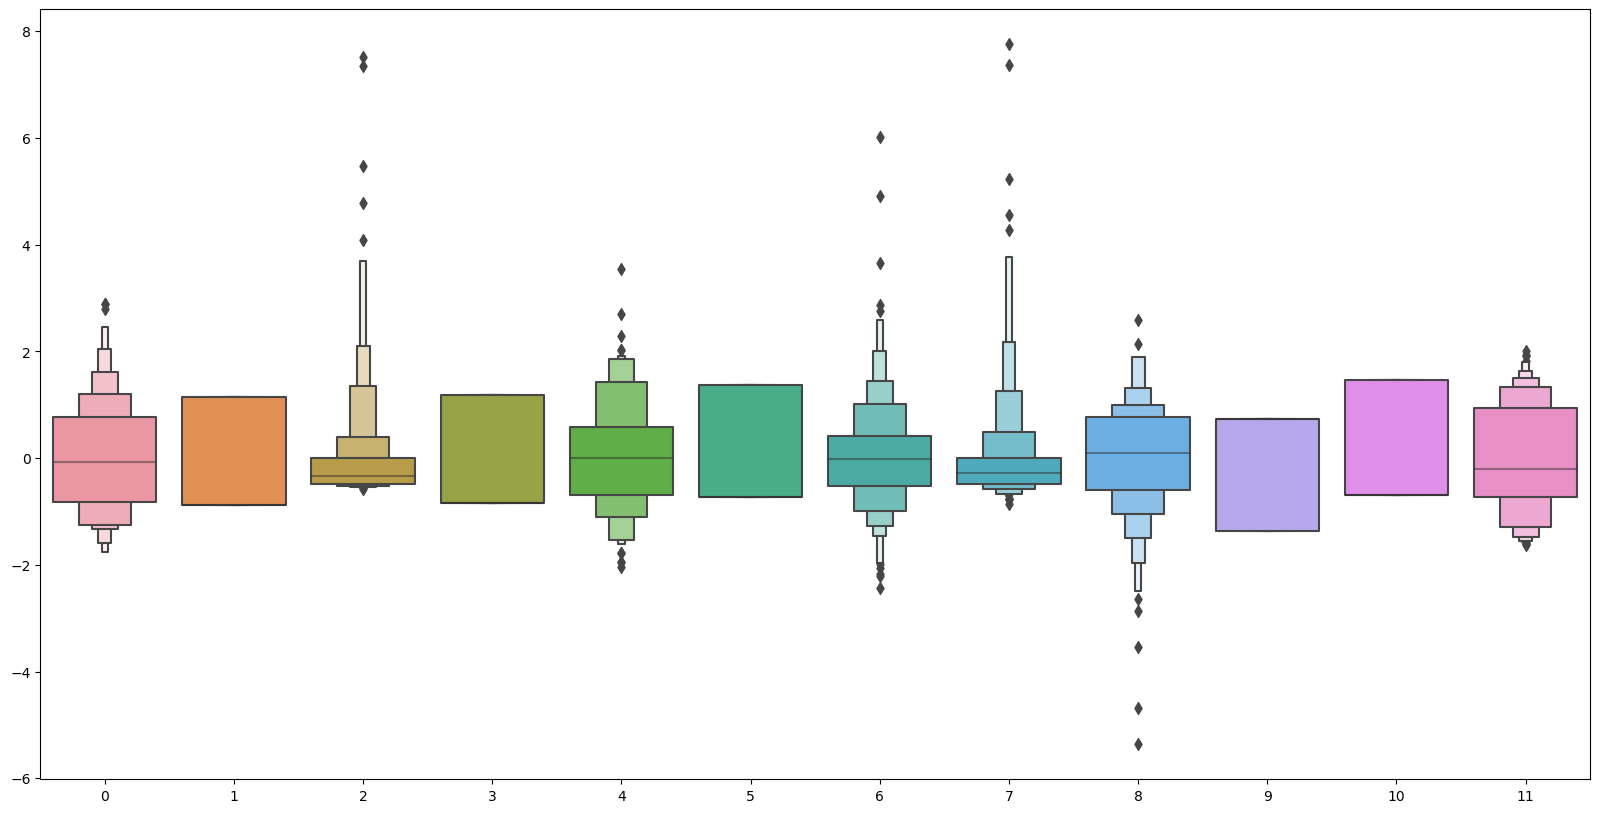

In [18]:
#cheking outlires
plt.figure(figsize=(20,10))
sns.boxenplot(data=x)
plt.show()

outlires have been smothed successfully

In [19]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=25)

In [20]:
#buliding our model 
model=svm.SVC()
model.fit(X_train,y_train)
pred=model.predict(X_test)


In [21]:
print("training score is "+str(  model.score (X_train,y_train)))
print("tetsing score is "+str( model.score (X_test, y_test)))



training score is 0.9090909090909091
tetsing score is 0.7888888888888889
